# Ergodicity and Density Dynamics simulations

The parameters are saved in the file `parameters.jl`. Let's start by importing the module ST1Ds.jl

In [1]:
include("../src/ThermostattedDynamics.jl")
using ThermostattedDynamics

Let's import the parameters file

In [2]:
include("parameters.jl")

ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

And codify them in the predefined type Parameters

In [3]:
parameters = Parameters(results, T, Q, dtsampling, dt, nsimulations, nsteps, thermo, potential, integrator)

ThermostattedDynamics.Parameters("trajectory",1.0,0.1,0.0125,0.0125,3,50000,ThermostattedDynamics.Thermostat{##1#2}("logistic",#1),ThermostattedDynamics.Potential{##3#4}("quartic",#3),ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp))

You may change the parameters from here. For instance, let's change the integrator from an adaptative RK45 to a Runge Kutta RK4 with fixed stepsize (the integrator, for the moment, must be supported in the package [ODE.jl](https://github.com/JuliaDiffEq/ODE.jl)

In [4]:
parameters.integrator

ThermostattedDynamics.Integrator{ODE.#ode45_dp}("RK45",ODE.ode45_dp)

In [5]:
parameters.integrator = Integrator("RK4", ode4)

ThermostattedDynamics.Integrator{ODE.#ode4}("RK4",ODE.ode4)

And let's compute the lyapunov exponents by changing the parameter `results`

In [6]:
parameters.results = "lyapunov"

"lyapunov"

We are ready to calculate the Lyapunov Spectrum for `nsimulations` initial conditions

In [7]:
parameters.nsimulations

3

In [8]:
runsimulation(parameters)

Simulation1 done
Simulation2 done
Simulation3 done
File lyapuTke7.hdf5 succesfully generated. See file in ../data/


The Lyapunov Spectrum were generated in the created folder ../data/. Let's explore them

In [10]:
using HDF5
file = h5open("../data/lyapuTke7.hdf5")
sim2 = read(file["simulation-2"])

Dict{String,Any} with 4 entries:
  "exp2"        => -0.000690356
  "exp3"        => -0.239086
  "initialcond" => [-0.145079,-0.0525879,-0.110083]
  "exp1"        => 0.23949

Now, let's integrate an initial random condition for a total time equal to `nsteps*dt*nsimulations`

In [11]:
parameters.results = "trajectory"

"trajectory"

In [12]:
runsimulation(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Trajectory trajafoHs.hdf5 succesfully generated. See file in ../data


The whole trajectory is saved in the file printed. Let's explore it

In [14]:
file = h5open("../data/trajafoHs.hdf5")
trajectory = read(file["tx"])

150001×4 Array{Float64,2}:
    0.0      1.40154    0.02446     -0.0657144  
    0.0125   1.40164   -0.00965488  -0.0782125  
    0.025    1.4013    -0.0454504   -0.0907017  
    0.0375   1.40049   -0.0834512   -0.103149   
    0.05     1.3992    -0.124209    -0.115513   
    0.0625   1.39737   -0.168309    -0.127744   
    0.075    1.39497   -0.21637     -0.139781   
    0.0875   1.39194   -0.269054    -0.151545   
    0.1      1.38822   -0.327066    -0.162934   
    0.1125   1.38374   -0.391155    -0.173823   
    0.125    1.37842   -0.462119    -0.184049   
    0.1375   1.37216   -0.540793    -0.193407   
    0.15     1.36486   -0.628048    -0.201641   
    ⋮                                           
 1874.86    -0.640649   1.29868     -0.0878284  
 1874.88    -0.623983   1.36736     -0.0781012  
 1874.89    -0.606487   1.43085     -0.0661087  
 1874.9     -0.588247   1.48594     -0.0519886  
 1874.91    -0.569388   1.52927     -0.0360337  
 1874.92    -0.550077   1.55777     -0.018

The data is saved in the format 
    $$t \quad q \quad p \quad \zeta$$
You may plot it

In [16]:
using PyPlot

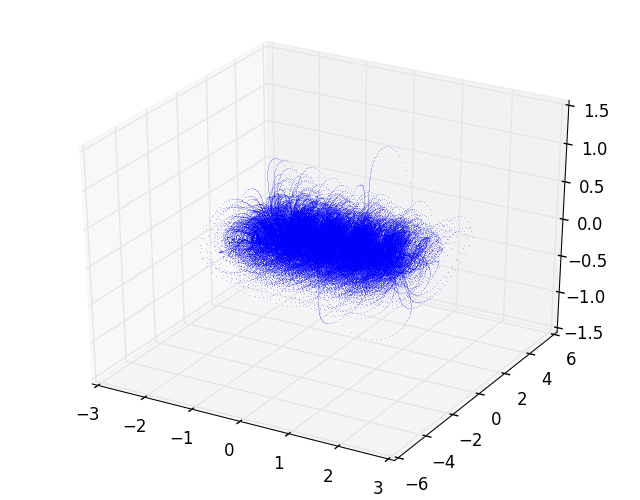

1-element Array{Any,1}:
 PyObject <mpl_toolkits.mplot3d.art3d.Line3D object at 0x7f356adcad10>

In [17]:
plot3D(trajectory[:,2], trajectory[:,3], trajectory[:,4], ".", ms = 0.5, alpha = 0.3)

## Poincaré sections

In [18]:
?sections

search: sections CompositeException InvalidStateException ProcessExitedException



This function computes the Poincare sections for the integrated trajectory saved in trajectorydata. It generates a .hdf5 file.

Example:

```
julia> sections("myfile", Potential("quartic", x -> x^4/4.), Thermostat("logistic", Q, z-> exp(z/Q)/(Q*( 1 +exp(z/Q))^2.)))
```


In [20]:
sections("trajafoHs", potential, thermo)

File sectionsafoHs.hdf5 succesfully generated. See file in ../data/


In [21]:
file = h5open("../data/sectionsafoHs.hdf5")
zsection = read(file["zsection"])
psection = read(file["psection"])

584×4 Array{Float64,2}:
    3.14055  -1.12526   -1.2494e-13   -0.0845371
    8.15789  -0.562267  -4.79811e-13  -0.0888993
   13.2569   -1.02825   -8.6879e-13   -0.0649865
   18.6957   -1.01268   -6.35365e-13   0.0250879
   24.3042   -1.10969   -5.13559e-13   0.192713 
   31.0465   -1.73088   -5.08286e-13   0.146641 
   39.0428   -1.73792   -3.26996e-13  -0.108498 
   45.741    -1.1372    -1.47544e-13  -0.058206 
   51.2353   -0.789213  -3.58948e-13   0.368828 
   57.2744   -1.32398   -4.84988e-13  -0.0144359
   63.6971   -1.40566   -7.52082e-13   0.19661  
   70.6937   -1.40174   -2.47867e-13  -0.170585 
   77.0999   -1.34719   -2.09653e-13   0.0532422
    ⋮                                           
 1799.1       1.2614     2.66109e-13   0.299604 
 1805.87      1.37601    8.86194e-13   0.262211 
 1813.9       2.27572    3.99175e-14   0.284956 
 1822.71      1.40214    7.71025e-13  -0.0180296
 1828.81      0.931496   4.4275e-13    0.111038 
 1834.21      0.954973   6.00663e-13   0.0100

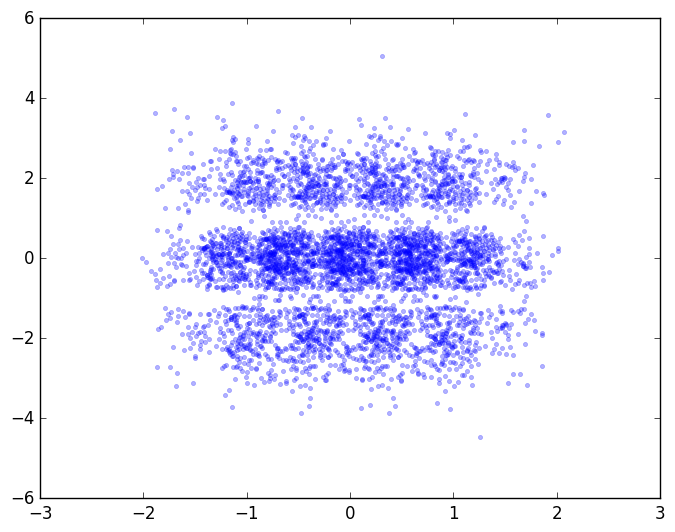

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f356961b8d0>

In [22]:
plot(zsection[:,2], zsection[:,3], ".", alpha = 0.3)

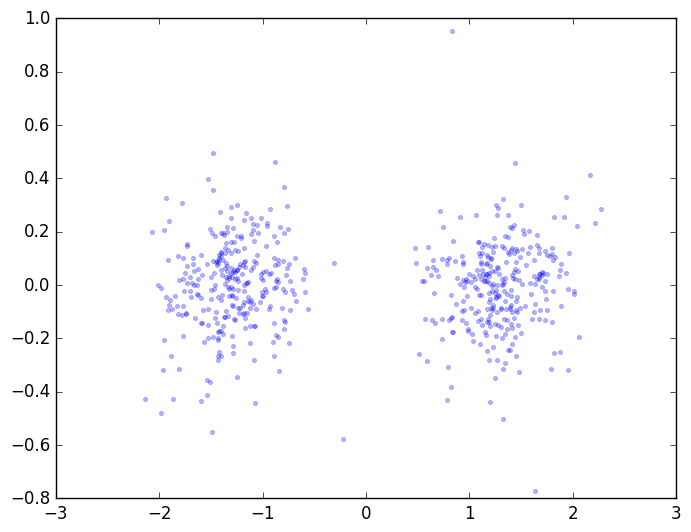

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3569555fd0>

In [23]:
plot(psection[:,2], psection[:,4], ".", alpha = 0.3)

## Marginal distributions

In [24]:
?marginaldistributions

search: marginaldistributions



This function generates an array saved as a plain text that contains the integrated trajectory together with each marginal theoretical distribution. The normalization factor associated with the distribution in `q` is passed as an argument.  Example:

```
julia> results = marginaldistributions(filename, Potential("quartic", x->x^4/4.), Thermostat("logistic", Q, x -> exp(x/Q)/(Q*(1.+ exp(x/Q)).^2)), normalizationfactor)
```


The normalization factor $Z$ corresponds to the configurational partition function, i.e.
    
$$ \rho(q) = \frac{e^{-\beta V(q)}}{Z} $$

$$ Z = \int_{-\infty}^{\infty} e^{-\beta V(q)} $$

For the quartic potential with $\beta = 1.0$, $Z = 2.563693352$

In [25]:
Z = 2.563693352
marginaldistributions("../data/trajafoHs", potential, thermo, Z)

File histafoHs succesfully generated. See file in ../data/


In [26]:
data_marg = readdlm("../data/histskJgg")

15001×6 Array{Float64,2}:
 -0.0180546  0.390062   0.628297    0.327484    -0.923667   0.000973828
  0.138389   0.390026   2.19231     0.0360784   -0.828024   0.00253349 
  0.575496   0.379511   3.05073     0.00380134   0.632346   0.0178731  
  0.791557   0.353598   0.846783    0.278745     0.93018    0.00091243 
  0.849025   0.342545   0.201503    0.390925     0.835834   0.00234324 
  0.860052   0.340196   0.0127864   0.39891      0.712168   0.00806105 
  0.857552   0.340735  -0.0416487   0.398596     0.587248   0.0280008  
  0.851198   0.342088  -0.056831    0.398299     0.462574   0.0960727  
  0.843764   0.343639  -0.0614449   0.39819      0.338016   0.318375   
  0.83583    0.345258  -0.0662046   0.398069     0.21352    0.945453   
  0.826778   0.347058  -0.0818922   0.397607     0.0891778  2.06212    
  0.813778   0.349557  -0.137326    0.395198    -0.0344388  2.42731    
  0.787151   0.354365  -0.325735    0.378329    -0.153405   1.4593     
  ⋮                                   

The data is saved in the format
$$q \quad \rho(q) \quad p \quad \rho(p) \quad \zeta \quad \rho(\zeta)  $$

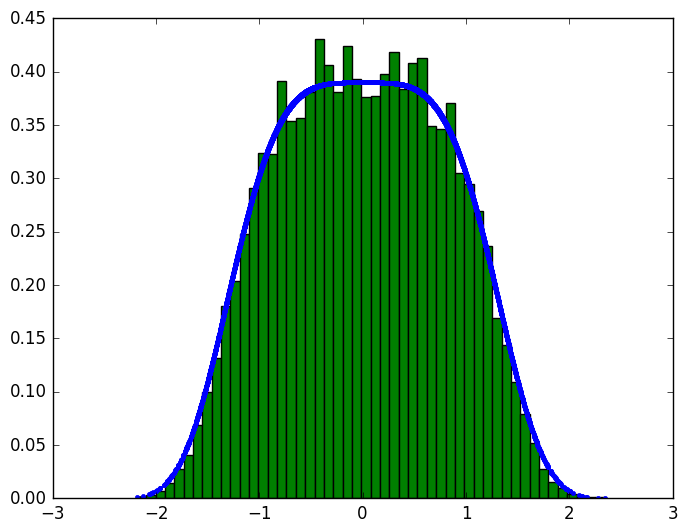

In [27]:
plot(data_marg[:,1], data_marg[:,2], ".", lw = 0.2)
plt[:hist](data_marg[:,1], 50, normed = true);

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Hellinger distance

In [28]:
?hellingerdistance

search: hellingerdistance



This function returns a plain data text that contains the hellinger distance calculated in n (10 by default) different intervals of a trajectory together with its error. The normalization factor associated with the distribution in `q` is passed as an argument. Example:

```
julia> hellingerdistance(filename, Potential("quartic", x->x^4./4.),
Thermostat("logistic", Q, x -> exp(x/Q)/(Q*(1.+ exp(x/Q)).^2)), normalizationfactor, n)
```


In [29]:
hellingerdistance("../data/trajafoHs", potential, thermo, Z)

1
2
3
4
5
6
7
8
9
10
File hellingerafoHs succesfully generated. See file in ../data/


In [34]:
data_hell = readdlm("../data/hellingerafoHs")

10×3 Array{Float64,2}:
  186.25  0.0616713  0.000610237
  373.75  0.0518575  0.00051723 
  561.25  0.0430542  0.000425911
  748.75  0.0528912  0.000527641
  936.25  0.051307   0.000513053
 1123.75  0.0472558  0.00047026 
 1311.25  0.0465742  0.000464635
 1498.75  0.0436418  0.000436343
 1686.25  0.042208   0.000421311
 1873.75  0.0427931  0.000426564

The data is returned in the format $$time \quad hellinger \quad error $$

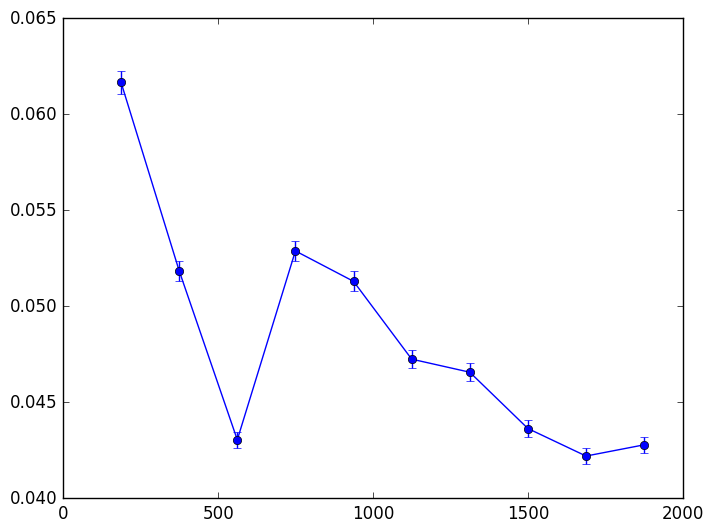

In [35]:
plt[:errorbar](data_hell[:,1], data_hell[:,2], yerr = data_hell[:,3], fmt = "o-");

As long as the trajectory is increased, the correspondence between the histogram and the theoretical marginal distribution improves

## Other thermostats

Consider, for instance, the Nosé-Hoover thermostat. In the density dynamics formalism it is given by

In [36]:
thermo = Thermostat("Nose-Hoover", x-> 1.0 / sqrt(T*2*pi*Q) *exp(-x^2./(T*2*Q))) 

ThermostattedDynamics.Thermostat{##5#6}("Nose-Hoover",#5)

In [40]:
parameters.thermo = thermo
parameters.potential = Potential("Harmonic", x->x^2./2.0)

ThermostattedDynamics.Potential{##7#8}("Harmonic",#7)

In [41]:
runsimulation(parameters)

Part 1 done. 
Part 2 done.
Part 3 done.
Trajectory trajx6l5x.hdf5 succesfully generated. See file in ../data


In [42]:
sections("trajx6l5x", potential, thermo)

File sectionsx6l5x.hdf5 succesfully generated. See file in ../data/


In [43]:
file = h5open("../data/sectionsx6l5x.hdf5")
zsection = read(file["zsection"])
psection = read(file["psection"]);

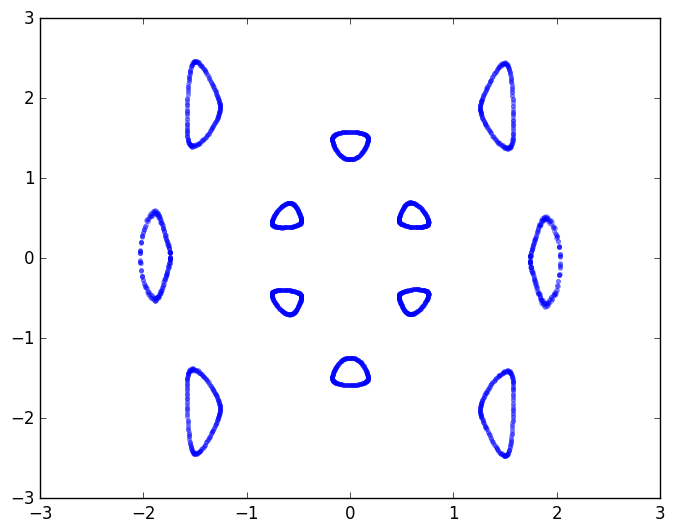

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3567b97610>

In [44]:
plot(zsection[:,2],zsection[:,3], ".", alpha = 0.3)